
# Project: Investigate a Dataset (TMDb movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# ^^
> **Tip**: you will find all analysis exlanation in EDA_REPORT


<a id='intro'></a>
## Introduction

> **data overview**:
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue


In [395]:
# Use this cell to set up import statements for all of the packages that youplan to use.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import requests 

%matplotlib inline
sns.set() # to set graph style to seaborn style

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, i will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

# data gathering 

#### dowlnod the data set 

In [396]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv'
file_name = url.split('/')[-1] 
r = requests.get(url, allow_redirects=True)

with open( file_name , 'wb' ) as f :
    f.write(r.content)

In [397]:
# Load your data 
df = pd.read_csv(file_name)

print("the data set has {} row af data and {} column of data ".format(df.shape[0] , df.shape[1]))

the data set has 10866 row af data and 21 column of data 


# data assesing 

### visual assesing
    i use excel to asses the data too

In [398]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


- id , imdb_id , homepage, overview , tagline i will not use them in the analysis so i will drop them 
- revenue and budjet are defined twice as revenue_adj and budjet_adj

### progrmatic assesing

In [399]:
## check for data type  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

- release_date data type is object it need to be a date

In [400]:
#check null values
df.isnull().sum() [df.isnull().sum() != 0]

imdb_id                   10
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
genres                    23
production_companies    1030
dtype: int64

- there is no many null values so i may keep them  

In [401]:
#check duplicated raw 
print("there is {} duplicate raw so i will delet it".format(df.duplicated().sum()))

there is 1 duplicate raw so i will delet it


In [402]:
# check valid data 
df[df.columns.tolist()[1:]].describe( )

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


###### ther is some data that doesn't make sense 
- 0 revenue , budjet , run_time 
- 900 in run time mean 15 hour 

## assesing report 
> **not important column**: id , imdb_id , homepage , overview , tagline

> **wrong data type**: convert release_date to date

> **duplicate**: delet the duplicate data raw

> **invalid data**: minimun in revenue , budjet , run_time  , maximum in run time 

> **add extra column**: release month  , gain which equal to revenue / budjet  movie_hero

> **split columns**: genere , production_company

/

# Data Cleaning

In [403]:
## make a copy for cleaning 

df_clean = df.copy()

##### define
- drop the notimportant columns  id , imdb_id , homepage , overview , tagline

In [404]:
#check befor deleting 
df_clean.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

###### code 

In [405]:
df_clean.drop([ 'id' , 'imdb_id' , 'homepage' , 'overview' , 'tagline' ] , axis=1 , inplace = True )

##### test

In [406]:
# check after deleting 
df_clean.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'keywords', 'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

##### define 
- convert release_date data type from string to date 

In [407]:
# check the type befor converting 
df_clean['release_date'].dtype

dtype('O')

##### code

In [408]:
df_clean['release_date']= pd.to_datetime(df_clean['release_date'])

##### test

In [409]:
# check the type after converting 
df_clean['release_date'].dtype

dtype('<M8[ns]')

##### define
delete the duplicated data raw

In [410]:
# count the dupliated befor deleting them 
df_clean.duplicated().sum()

1

##### code

In [411]:
df_clean.drop_duplicates(inplace = True)

##### test 

In [412]:
# count the dupliated after deleting them 
df_clean.duplicated().sum()

0

##### define 
- there is invalid data in revenue , budget , run_time , maximum in run time

In [413]:
# count any movie with budget less then 1000 dolars
df_clean[df_clean['budget'] < 1000 ].count()[0]

5755

In [414]:
# count any movie with revenue less then 100 dolars
df_clean[df_clean['revenue'] < 500 ].count()[0]

6063

In [415]:
# count any movie with time 0 minutes 
df_clean[df_clean['runtime'] == 0 ].count()[0]

31

In [416]:
# count any movie with time more than 5 hours  
df_clean[df_clean['runtime'] > 300 ].count()[0]

22

##### code 
delete that movies

In [417]:
df_clean = df_clean[df_clean['budget'] > 1000]
df_clean = df_clean[df_clean['revenue'] > 500]
df_clean = df_clean[df_clean['runtime'] != 0]
df_clean = df_clean[df_clean['runtime'] < 300]

##### test

In [418]:
df_clean[df_clean['budget'] < 1000 ].count()[0]

0

In [419]:
df_clean[df_clean['revenue'] < 500 ].count()[0]

0

In [420]:
df_clean[df_clean['runtime'] == 0 ].count()[0]

0

In [421]:
df_clean[df_clean['runtime'] > 300 ].count()[0]

0

## add an extra column represent the precentage of revenue to budget

In [422]:
df_clean["gain"] = df_clean['revenue'] / df_clean['budget']
df_clean = df_clean[df_clean['gain'] < 100] # removing outlayers


## add extra columns for month of releasing then delete the date 

In [423]:
df_clean['release_month'] = df_clean['release_date'].dt.month
df_clean.drop('release_date' , inplace=True , axis=1)

## mainpulate genre , cast , production_comapny 

In [424]:
#main hero  represent the first person in cast
df_clean['main_hero'] = df_clean.cast.str.split("|" , expand =True).iloc[:,:1]

#get the first onr genres only
df_clean[['genere1']] = df_clean.genres.str.split("|",expand=True).iloc[:,:1]

#get the first two gemres only
df_clean[['company1']] = df_clean.production_companies.str.split("|",expand=True).iloc[:,:1]
        

df_clean.drop( ['production_companies' , 'cast' , 'keywords' , 'genres' , 'production_companies' ], inplace=True , axis=1)


In [426]:
df_clean.head()

,popularity,budget,revenue,original_title,director,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,gain,release_month,main_hero,genere1,company1
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,5562,6.5,2015,1.379999e+08,1.392446e+09,10.090192,6,Chris Pratt,Action,Universal Studios
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,6185,7.1,2015,1.379999e+08,3.481613e+08,2.522909,5,Tom Hardy,Action,Village Roadshow Pictures
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,2480,6.3,2015,1.012000e+08,2.716190e+08,2.683984,3,Shailene Woodley,Adventure,Summit Entertainment
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,5292,7.5,2015,1.839999e+08,1.902723e+09,10.340891,12,Harrison Ford,Action,Lucasfilm
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,2947,7.3,2015,1.747999e+08,1.385749e+09,7.927628,4,Vin Diesel,Action,Universal Pictures


### save the cleaned data to a file 

In [428]:
print ( "the cleaned data shape is " , df_clean.shape )

df_clean.to_csv( "cleaned_data" , index = 0)

df_clean.head(1)

the cleaned data shape is  (3796, 16)


,popularity,budget,revenue,original_title,director,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,gain,release_month,main_hero,genere1,company1
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,5562,6.5,2015,1.379999e+08,1.392446e+09,10.090192,6,Chris Pratt,Action,Universal Studios


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.



## movies distribution over years

the year with the muximum number of movies is  2011
the year with the minimum number of movies is  1969


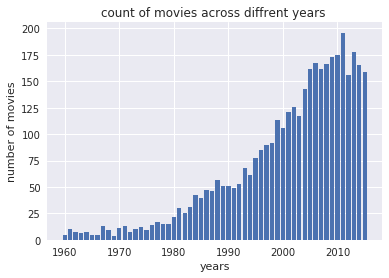

In [429]:
year_count = df_clean['release_year'].value_counts().sort_index()

plt.bar(year_count.index , year_count.values) 
plt.title("count of movies across diffrent years ")
plt.xlabel('years')
plt.ylabel('number of movies')

print("the year with the muximum number of movies is " , df_clean['release_year'].mode()[0] )
print("the year with the minimum number of movies is " , df_clean['release_year'].value_counts().sort_values().index.tolist()[0] )

- Its clearly that the distribution is left skewed  that’s mean the number of movie increase every year with exponential relation 

## what is the year with biggest total adjustable revenue and the year with high gain ?



high gain was in  1972


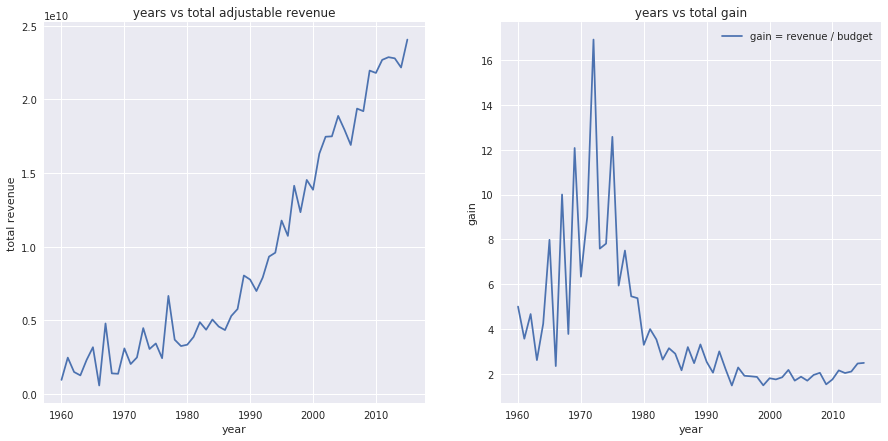

In [430]:
rev_sum = df_clean.groupby('release_year').sum()['revenue_adj']

fig, (ax1, ax2 ) = plt.subplots(1, 2 , figsize=(15,7) )
                              
ax1.plot(rev_sum.index , rev_sum.values ) ; 
ax1.set_title(" years vs total adjustable revenue ")
ax1.set_xlabel('year')
ax1.set_ylabel('total revenue')

rev_sum = df_clean.groupby('release_year').median()['gain']
ax2.plot(rev_sum.index , rev_sum , label= 'gain = revenue / budget') ; 
ax2.set_title(" years vs total gain ");
ax2.set_xlabel('year');
ax2.set_ylabel('gain');
ax2.legend()

print('high gain was in ', rev_sum.sort_values().index[-1] )

- its clearly that the revenue has an exponential distribution and that make sense because many reasons such as marketing , income m peoples interests , number of movies  …etc .


- This gain graph show that the heist gain was in 1972 that mean you could use small budget to gain high revenue but now to get more revenue you should but more budget .


## find the best month 

high gain was in  6
low gain was in  9


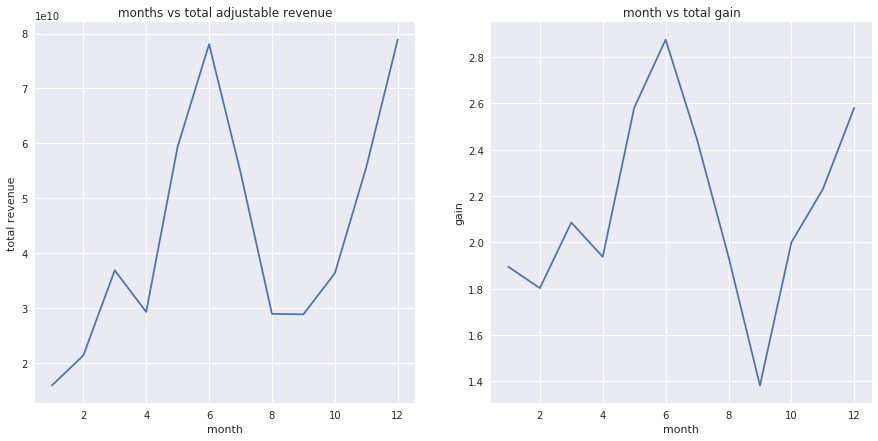

In [431]:
rev_sum = df_clean.groupby('release_month').sum()['revenue_adj']

fig, (ax1, ax2 ) = plt.subplots(1, 2 , figsize=(15,7) )

ax1.plot(rev_sum.index , rev_sum) ; 
ax1.set_title(" months vs total adjustable revenue ")
ax1.set_xlabel('month')
ax1.set_ylabel('total revenue')

rev_sum = df_clean.groupby('release_month').median()['gain']
ax2.plot(rev_sum.index , rev_sum , label= 'gain = revenue / budget') ; 
ax2.set_title(" month vs total gain ");
ax2.set_xlabel('month');
ax2.set_ylabel('gain');

print('high gain was in ', rev_sum.sort_values().index[-1] )
print('low gain was in ', rev_sum.sort_values().index[0] )

- Obviously the best month to publish your movie is 6 or 12  because you have more chance to gain more revenue . 

- Don’t take the risk and publish your movie in month with low gain because you maybe will gain little revenue 


## movies per month distrbution 

the month with the muximum number of movies is  9
the month with the minimum number of movies is  1


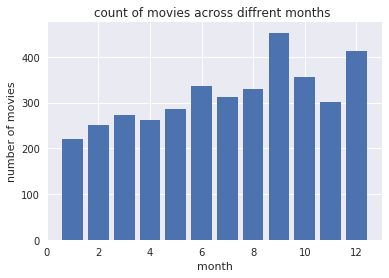

In [433]:
month_count = df_clean['release_month'].value_counts().sort_index()

plt.bar(month_count.index , month_count.values) 
plt.title("count of movies across diffrent months ")
plt.xlabel('month')
plt.ylabel('number of movies')

print("the month with the muximum number of movies is " , df_clean['release_month'].mode()[0] )
print("the month with the minimum number of movies is " , df_clean['release_month'].value_counts().sort_values().index.tolist()[0] )

- It seems that the companies doesn’t  know the best month because as you see 


## the relation between years and votes


Text(0.5,1,'votes counts vs years')

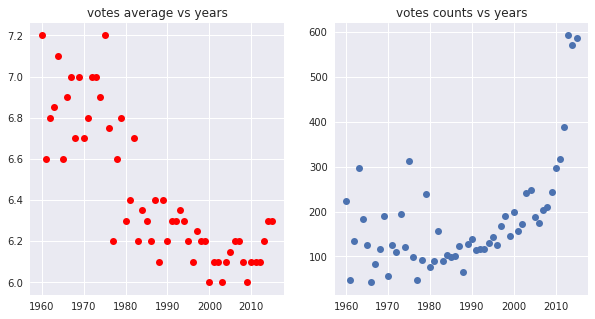

In [434]:
votes_year = df_clean.groupby('release_year').median()[['vote_average' , 'vote_count']]

fig, (ax1, ax2 ) = plt.subplots(1, 2 , figsize=(10,5) )

ax1.plot( votes_year.index , votes_year['vote_average'] , 'ro')
ax1.set_title('votes average vs years')
ax2.plot( votes_year.index , votes_year['vote_count'],'o')
ax2.set_title('votes counts vs years')


- Its wired but over years number of votes increase but the average votes decrease.  


##  run time 


(109.34562697576396, 106.0)

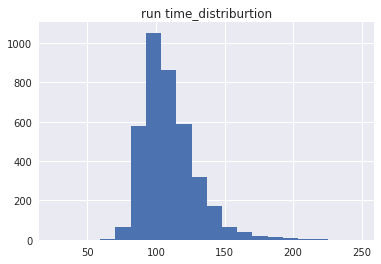

In [435]:
plt.hist(df_clean['runtime'] , bins=20)
plt.title('run time_distriburtion')
df_clean['runtime'].mean() , df_clean['runtime'].median()

- Run time has no obvious relation with any variable . 
- Run time mean :-  109 
- Run time median :-   106 

### Research Question 2  (best and Worst movies )

In [436]:
print("best_movies")
print( 'the higher revenue is--> ',df_clean[df_clean.revenue_adj == df_clean.revenue_adj.max() ]['original_title'].values[0])
print('the higher vote is -->  ',df_clean[df_clean.vote_average == df_clean.vote_average.max() ]['original_title'].values[0])
print( 'the is higher profit --> ' ,df_clean[ (df_clean.revenue_adj-df_clean.budget_adj) == (df_clean.revenue_adj-df_clean.budget_adj).max() ]['original_title'].values[0])
print('the higher gain is --> ' , df_clean[df_clean.gain == df_clean.gain.max() ]['original_title'].values[0])


best_movies
the higher revenue is-->  Avatar
the higher vote is -->   The Shawshank Redemption
the is higher profit -->  Star Wars
the higher gain is -->  The Rocky Horror Picture Show


In [437]:
print('the Worst movies ')
# 
print('the lower revenue is --> ' ,df_clean[df_clean.revenue_adj == df_clean.revenue_adj.min() ]['original_title'].values[0])
print( 'the lower vote is ' , df_clean[df_clean.vote_average == df_clean.vote_average.min() ]['original_title'].values[0])
print( 'the lower profit is --> ' , df_clean[ (df_clean.revenue_adj-df_clean.budget_adj) == (df_clean.revenue_adj-df_clean.budget_adj).min() ]['original_title'].values[0])
print( 'the lower gain is --> ' , df_clean[df_clean.gain == df_clean.gain.min() ]['original_title'].values[0])

the Worst movies 
the lower revenue is -->  Best Man Down
the lower vote is  Foodfight!
the lower profit is -->  The Warrior's Way
the lower gain is -->  Death Defying Acts


## find the most popular director with more than15 movies 

Steven Spielberg     27
Clint Eastwood       24
Ridley Scott         21
Woody Allen          18
Martin Scorsese      17
Steven Soderbergh    17
Tim Burton           16
Name: director, dtype: int64

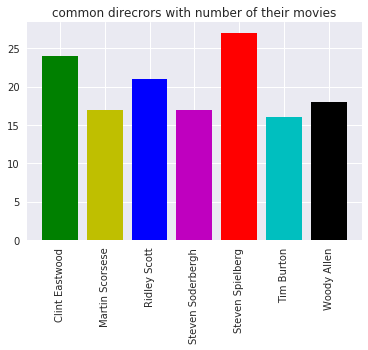

In [438]:
dir_names = df_clean['director'].value_counts()[df_clean['director'].value_counts() > 15 ]

plt.xticks(rotation='vertical')
plt.bar( dir_names.index ,  dir_names.values , color='rgbkymc'    )

plt.title('common direcrors with number of their movies')

dir_names

## the most popular director with more than 50 movies


In [439]:
df_clean['company1'].value_counts()[df_clean['company1'].value_counts() > 50 ]

Universal Pictures                        282
Paramount Pictures                        260
Columbia Pictures                         177
Twentieth Century Fox Film Corporation    164
New Line Cinema                           139
Walt Disney Pictures                      116
Miramax Films                              77
Warner Bros.                               75
Columbia Pictures Corporation              66
Village Roadshow Pictures                  66
DreamWorks SKG                             59
TriStar Pictures                           57
Name: company1, dtype: int64

In [440]:
df_clean.groupby('director').median().loc[dir_names.index.tolist()][['budget_adj' , 'revenue_adj' , 'gain' , 'vote_average' ]].sort_values('revenue_adj', ascending=False)

,budget_adj,revenue_adj,gain,vote_average
director,,,,
Steven Spielberg,6.926672e+07,4.268546e+08,4.266667,6.9
Tim Burton,7.226958e+07,1.527780e+08,2.964176,6.6
Clint Eastwood,3.875860e+07,1.181567e+08,3.344524,6.7
Ridley Scott,7.089506e+07,1.147286e+08,1.628024,6.3
Martin Scorsese,5.132198e+07,1.082936e+08,2.232930,7.1
Steven Soderbergh,3.461341e+07,5.931901e+07,1.619699,6.3
Woody Allen,1.677039e+07,5.186416e+07,4.672915,6.8


- The best director is Steven Spielberg 


## analysis the first person in the cast

#### get the most popular actors with movies more than 20 


,budget_adj,revenue_adj,gain,vote_average
main_hero,,,,
John Travolta,6.125927e+07,2.173701e+08,9.352698,6.028571
Tom Hanks,7.686975e+07,3.456860e+08,5.042067,6.778571
Tom Cruise,9.380248e+07,3.656239e+08,4.949371,6.429630
Harrison Ford,7.978699e+07,3.530982e+08,4.369419,6.282609
Jim Carrey,6.361998e+07,2.151571e+08,4.195820,6.291304
Sylvester Stallone,6.719206e+07,2.119823e+08,4.103160,6.029630
Arnold Schwarzenegger,8.316739e+07,2.296522e+08,3.556022,5.853846
Eddie Murphy,7.131055e+07,1.966644e+08,3.515317,5.539130
Adam Sandler,6.509282e+07,1.847532e+08,3.089461,6.025000


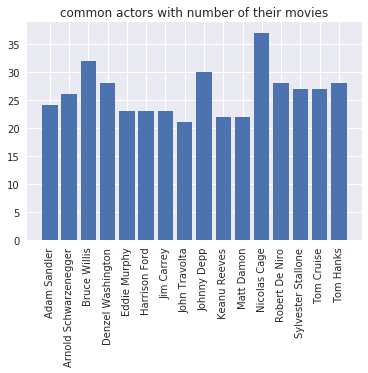

In [442]:
actor_names = df_clean['main_hero'].value_counts()[df_clean['main_hero'].value_counts() > 20 ]

plt.xticks(rotation='vertical')
plt.bar( actor_names.index ,  actor_names.values  ) ;

plt.title('common actors with number of their movies');


df_clean.groupby('main_hero').mean().loc[actor_names.index.tolist()][['budget_adj' , 'revenue_adj' , 'gain' , 'vote_average' ]].sort_values('gain', ascending=False)

- Its wired but actors that there name starts with tom are the best 


### director thet love spacefic actor to work with
#### i studied the case that the actor wotk with the same director more than 5 times

In [443]:
df_clean.groupby(['main_hero' , 'director']).count()['popularity'][df_clean.groupby(['main_hero' , 'director']).count()['popularity']>5]

main_hero           director          
Adam Sandler        Dennis Dugan           7
Clint Eastwood      Clint Eastwood        12
George Clooney      Steven Soderbergh      6
Johnny Depp         Tim Burton             6
Sylvester Stallone  Sylvester Stallone     6
Woody Allen         Woody Allen           10
Name: popularity, dtype: int64

- It’s wired but Sylvester Stallone is the director for the movies he act in 


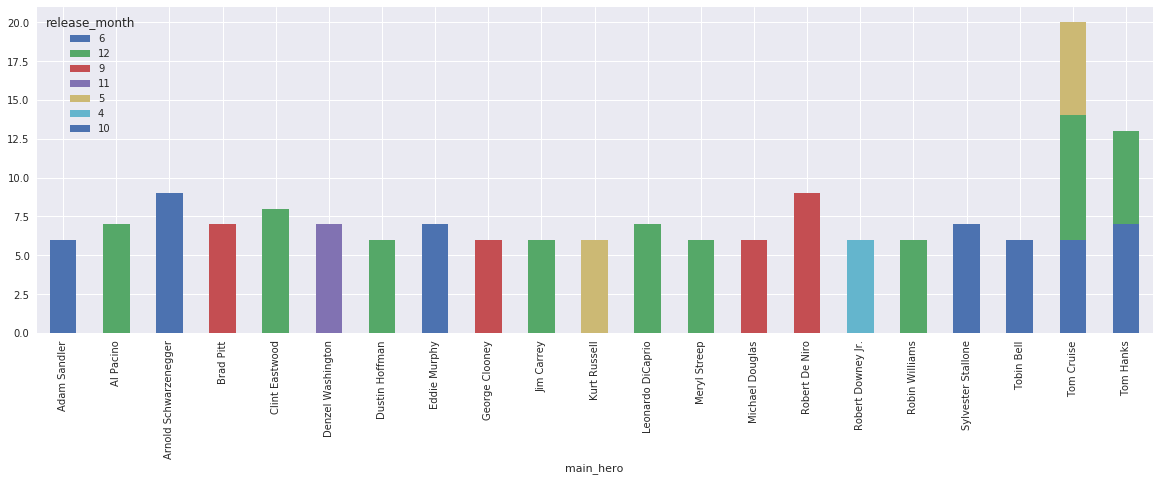

In [444]:
data = df_clean.groupby(['main_hero' , 'release_month']).count()['popularity'][df_clean.groupby(['main_hero' , 'release_month']).count()['popularity']>5]
data.unstack().plot(kind='bar', stacked=True  , figsize=(20,6));
plt.show()

## companies that work with the same actor and director more than 3 time 

In [445]:
df_clean.groupby([ 'company1' , 'main_hero' , 'director']).count()['popularity'][df_clean.groupby([ 'company1' , 'main_hero' , 'director']).count()['popularity']>3]

company1              main_hero       director        
Columbia Pictures     Adam Sandler    Dennis Dugan        5
Lions Gate Films      Tyler Perry     Tyler Perry         4
Lucasfilm             Harrison Ford   Steven Spielberg    4
Malpaso Productions   Clint Eastwood  Clint Eastwood      4
Silver Pictures       Mel Gibson      Richard Donner      5
Walt Disney Pictures  Johnny Depp     Gore Verbinski      4
Name: popularity, dtype: int64

- That’s because they gain more revenue whith each other 


## genre study

#### find the popular genre in each year 

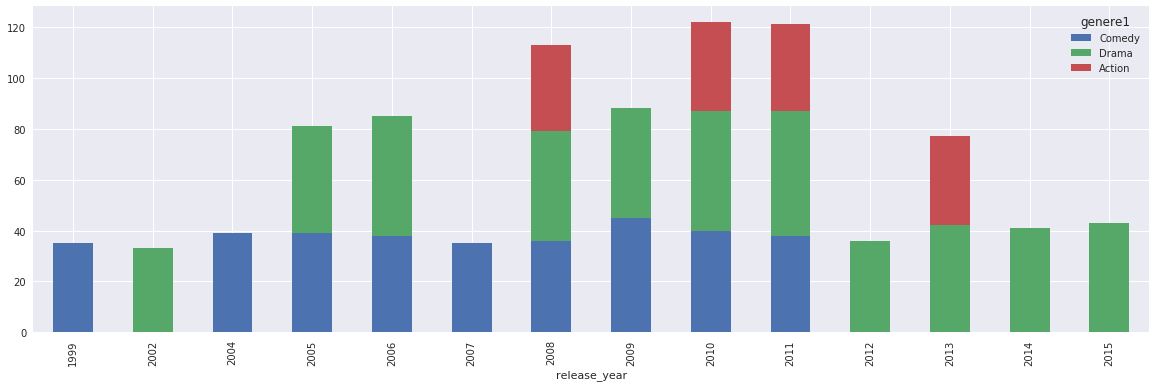

In [446]:
data = df_clean.groupby(['release_year' , 'genere1']).count()['popularity'][df_clean.groupby(['release_year' , 'genere1']).count()['popularity']>30]
data.unstack().plot(kind='bar', stacked=True  , figsize=(20,6));


- there is a relation as every year has a common movie category 

- There is a relation between the month of release and the actor there is actors that release their movie in the same month  such as Robert De Niro  love month 9 


## common genere 

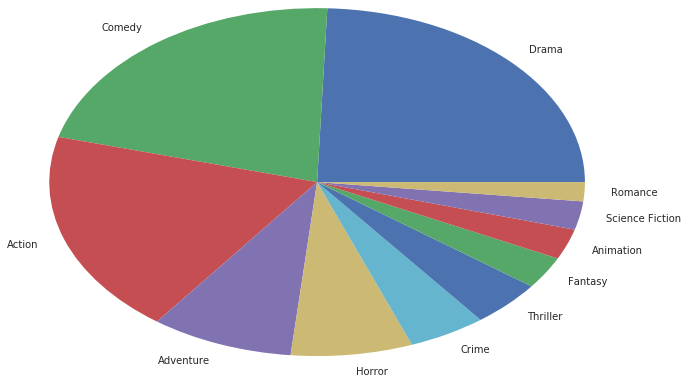

In [447]:
data = df_clean['genere1'].value_counts()[df_clean['genere1'].value_counts() > 50 ]
plt.pie( data.values , labels = data.index ,startangle =0 , radius=2 );

- the most commo genere is drama  

## Genres with high profit 

In [451]:
data = df_clean.groupby(['genere1']).median()
print("best_generes")
print( 'the higher revenue is--> ',data[data.revenue_adj == data.revenue_adj.max()].index[0] ) 
print('the higher vote is -->  ',data[data.vote_average == data.vote_average.max() ].index[0])
print( 'the is higher profit --> ' ,data[ (data.revenue_adj-data.budget_adj) == (data.revenue_adj-data.budget_adj).max() ].index[0])
print('the higher gain is --> ' , data[data.gain == data.gain.max() ].index[0])

best_generes
the higher revenue is-->  Animation
the higher vote is -->   Documentary
the is higher profit -->  Animation
the higher gain is -->  TV Movie


In [452]:
data = df_clean.groupby(['genere1']).median()
print("worest_movies")
print( 'the lower revenue is--> ',data[data.revenue_adj == data.revenue_adj.min()].index[0] ) 
print('the lower vote is -->  ',data[data.vote_average == data.vote_average.min() ].index[0])
print( 'the is lower profit --> ' ,data[ (data.revenue_adj-data.budget_adj) == (data.revenue_adj-data.budget_adj).min() ].index[0])
print('the lowe gain is --> ' , data[data.gain == data.gain.min() ].index[0])

worest_movies
the lower revenue is-->  Documentary
the lower vote is -->   TV Movie
the is lower profit -->  Documentary
the lowe gain is -->  Mystery


## the relation between genre and other parameters

### company
- some companies prefer genre and doesn't prefere the rest 

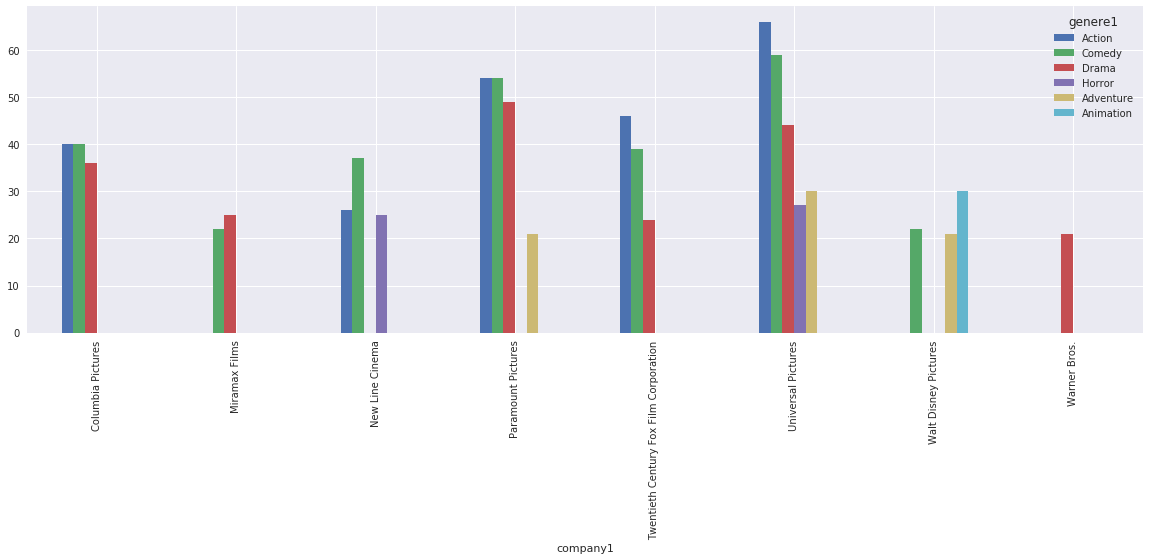

In [453]:
data = df_clean.groupby([ 'company1' , 'genere1']).count()['popularity'][df_clean.groupby([ 'company1' , 'genere1' ]).count()['popularity']>20]
data.unstack().plot(kind='bar'  , figsize=(20,6) );


## directors 
- as you see there is some directors as martin scorsese prefer drama and woody allen prefer comedy

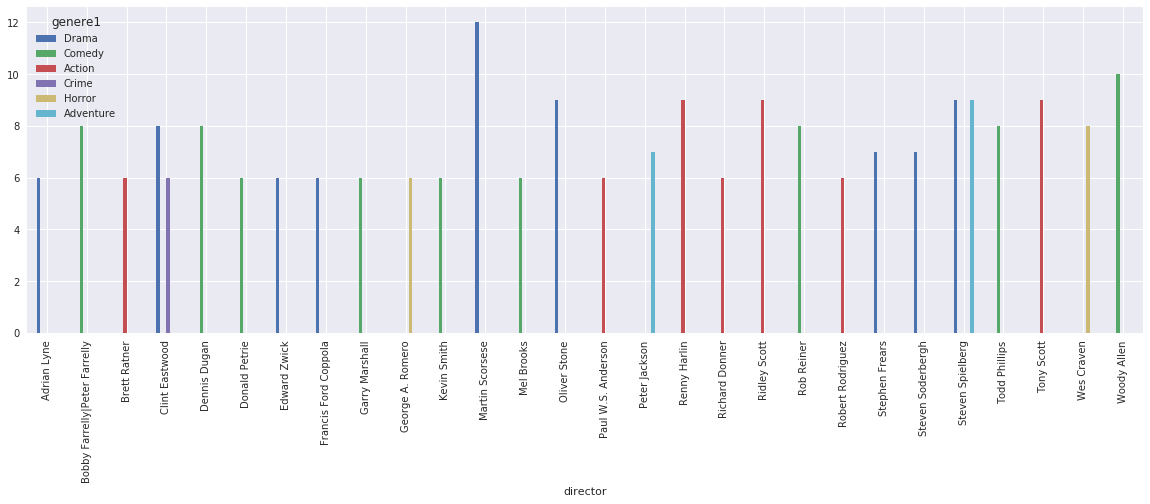

In [454]:
data = df_clean.groupby([ 'director' , 'genere1']).count()['popularity'][df_clean.groupby([ 'director' , 'genere1' ]).count()['popularity']>5]
data.unstack().plot(kind='bar'  , figsize=(20,6) );


## actors
- as you see there is some directors as sylvester stallone prefer action and woody adam sandler prefer comedy

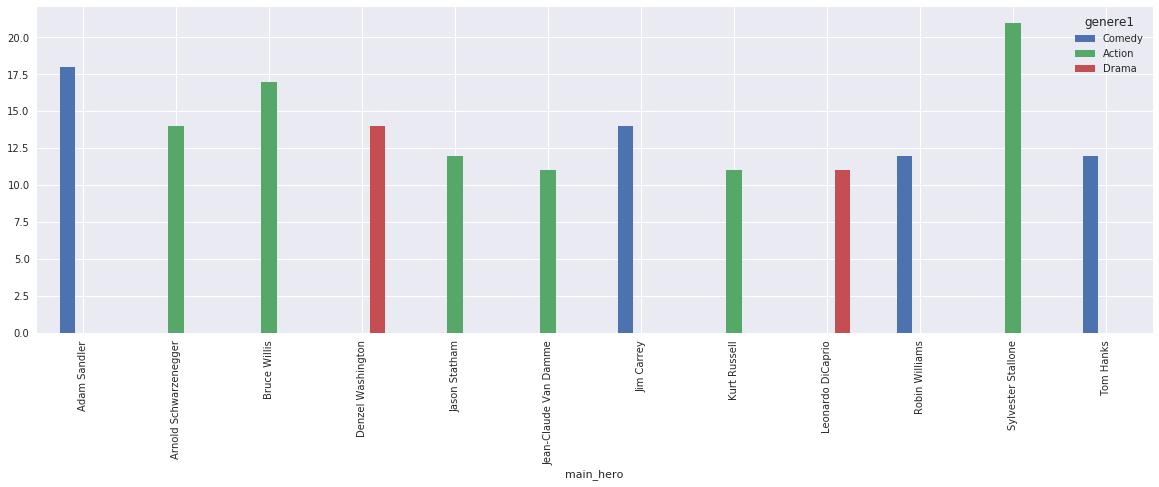

In [455]:
data = df_clean.groupby([ 'main_hero' , 'genere1']).count()['popularity'][df_clean.groupby([ 'main_hero' , 'genere1' ]).count()['popularity']>10]
data.unstack().plot(kind='bar'  , figsize=(20,6) );


# SUUMARRY :-

### all result and explanation is  in EDA_REPORT.PDF
### The extrnal resources
- search in stack overflow to find error's solution and some usful function parameter
- i read the comment on the data in kaggle to know column documentation

In [456]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0